<a href="https://colab.research.google.com/github/cr21/Unsupervised-Machine-Learning-Clustering/blob/main/FeatureSelectionAndPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
cd drive/MyDrive/Dataset/

/content/drive/MyDrive/Dataset


In [3]:
ls

 2gaussian.txt                      model2.log
 3gaussian.txt                      model.log
 blobs.csv                          model.log1
 blobs.gsheet                       model.log11
 circle.csv                         model.log.gdoc
 circle.gsheet                      moons.csv
'Convolution Layer.ipynb'           moons.gsheet
'Copy of Convolution Layer.ipynb'  'MSR-LA - 3467.docx'
 dbscan.csv                         PetImages/
 dbscan.gsheet                      processedBlob.csv
 DensityClusters.ipynb              processedCircle.csv
 dogscats.npy                       processedMoons.csv
 dogscats.txt                       proof_1b.jpeg
 Gaussian_Mixture_Models_2D.ipynb  'readme[1].txt'
 GaussianMixuerModel.ipynb          spambase.data
 household_power_consumption.txt    spambase.gdoc
 kagglecatsanddogs_3367a.zip        spambase.txt
 MNIST/                             spamfeatures.txt
 mnist.log                          training_data.npy


In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  train_test_split


# Run logistic regression on MNIST dataset

In [6]:
def loadMNIST() :
  data= fetch_openml('mnist_784', version=1, return_X_y=False, )  
  X = data.data
  Y = data.target
  target_names = data.target_names
  featureNames =  data.feature_names
  return X, Y, target_names, featureNames
  


In [7]:
X, Y, target_names, featureNames= loadMNIST()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


In [8]:
logisticClassfier = LogisticRegression(penalty='l2', tol =0.0001, C = 1.0,n_jobs=-1)
logisticClassfier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
print(f" train error : {logisticClassfier.score(X_train, y_train)}")

 train error : 0.9372494669509595


In [10]:
print(f"test Error : {logisticClassfier.score(X_test, y_test)}")

test Error : 0.9190909090909091


In [11]:
# Top 30 features
sorted_featuresList = np.argsort(logisticClassfier.coef_)
# reverse for maximum to minimum important features
reverse_sorted_featuresList = sorted_featuresList[::-1]
# select top 30 features
top30ids = reverse_sorted_featuresList[:,:30]
for id, features in enumerate(top30ids) :
  
  featureNameList = np.array(featureNames)[features]
  print(f" class : {id} , feature name : {featureNameList}")

 class : 0 , feature name : ['pixel129' 'pixel130' 'pixel573' 'pixel654' 'pixel131' 'pixel687'
 'pixel501' 'pixel572' 'pixel416' 'pixel473' 'pixel417' 'pixel500'
 'pixel389' 'pixel127' 'pixel445' 'pixel528' 'pixel603' 'pixel150'
 'pixel481' 'pixel128' 'pixel132' 'pixel582' 'pixel606' 'pixel529'
 'pixel237' 'pixel257' 'pixel571' 'pixel509' 'pixel602' 'pixel361']
 class : 1 , feature name : ['pixel678' 'pixel415' 'pixel679' 'pixel482' 'pixel650' 'pixel743'
 'pixel540' 'pixel744' 'pixel402' 'pixel327' 'pixel416' 'pixel400'
 'pixel565' 'pixel468' 'pixel187' 'pixel469' 'pixel502' 'pixel271'
 'pixel709' 'pixel297' 'pixel570' 'pixel413' 'pixel414' 'pixel369'
 'pixel537' 'pixel742' 'pixel495' 'pixel575' 'pixel626' 'pixel564']
 class : 2 , feature name : ['pixel377' 'pixel405' 'pixel350' 'pixel595' 'pixel378' 'pixel579'
 'pixel349' 'pixel433' 'pixel460' 'pixel555' 'pixel578' 'pixel567'
 'pixel583' 'pixel581' 'pixel582' 'pixel596' 'pixel543' 'pixel580'
 'pixel665' 'pixel608' 'pixel666' 'pixel664

#Logistic Regression News Group Dataset

In [12]:
def loadNGData( seed = 20) :
  # data = fetch_20newsgroups( remove=('headers','footers','quotes'), random_state= 20)
  
  dataset = fetch_20newsgroups(subset='all', remove=('headers','footers','quotes'), random_state= seed)
  data = dataset.data
  labels = dataset.target
  features = data
  # vectorize the text data
  vectorizer = TfidfVectorizer(stop_words='english',min_df = 5)
  # vectorize train data
  ngVectorData = vectorizer.fit_transform(data)
  ngVectorDataDense = ngVectorData.toarray()

  return ngVectorDataDense, labels

In [16]:
def load20NG():
  dataset = fetch_20newsgroups(subset='all', remove=('headers','footers','quotes'), random_state= 12)
  data = dataset.data
  labels = dataset.target

  vectorizer = TfidfVectorizer(stop_words='english',min_df = 5)

  # # vectorize train data
  ngVectorData = vectorizer.fit_transform(data)
  featureNames = vectorizer.get_feature_names()
  return data, labels, ngVectorData, featureNames

In [14]:
data, labels, ng20Data, ng20featureNames = load20NG()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(ng20Data, labels, test_size=0.33, random_state=42)

In [18]:
ngClassfier = LogisticRegression(penalty='l2', tol =0.0001, C = 1.0,n_jobs=-1)
ngClassfier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
# training error
print(f" training Error : {ngClassfier.score(X_train, y_train)}")

 training Error : 0.8969586567400601


In [20]:
#testing error
print(f" testing Error : {ngClassfier.score(X_test, y_test)}")

 testing Error : 0.732475884244373


In [21]:
# Top 30 features
sorted_ngFeatureList = np.argsort(ngClassfier.coef_)
# reverse for maximum to minimum important features
reverse_sorted_ngFeatureList = sorted_ngFeatureList[::-1]
# select top 30 features
top30NGids = reverse_sorted_ngFeatureList[:,:30]
for id, features in enumerate(top30NGids) :
  
  featureNameList = np.array(ng20featureNames)[features]
  print(f" class : {id} , feature name : {featureNameList}")

 class : 0 , feature name : ['thanks' 'need' 'year' 'edu' 'problem' 'like' 'work' 'email' 'sure' 'hi'
 'drive' 'help' 'best' 'data' 'use' 'computer' 'space' 'sound' 'using'
 'software' 'file' 'control' 'phone' 'windows' 'card' 'program' 'games'
 'pc' 'news' 'local']
 class : 1 , feature name : ['thanks' 'god' 'software' 'stuff' 'computer' 'space' 'email' 'religion'
 'phone' 'christian' 'available' 'read' 'edu' 'chip' 'jesus' 'info'
 'interested' 'file' 'john' 'card' 'team' 'jim' 'work' 'box' 'reply'
 'hard' 'advance' 'windows' 'help' 'appreciated']
 class : 2 , feature name : ['good' 'use' 'thanks' 'com' 'mail' 'god' 'looking' 'new' 'computer'
 'list' 'jesus' 'stuff' 'game' 'll' 'data' 'available' 'drive' 'email'
 'windows' 'got' 'koresh' 'probably' 'work' 'little' 'haven' 'high' 've'
 'version' 'code' 'gun']
 class : 3 , feature name : ['thanks' 'problem' 'new' 'program' 'software' 'windows' 'book' 'mail'
 'bit' 'phone' 'drive' 'looking' 'advance' 'company' 'space' 'games'
 'problems'

#Logistic Regression on Spam Data

In [22]:
def loadSpamData(fileName = 'spambase.data') :
  data = []
  labels = []
  with open(fileName,'r') as f:
    dataset = f.readlines()
    for line in dataset:
      arr = line.split(",")
      data.append(arr[:-1])
      labels.append(arr[-1])
  data = np.array(data).astype(np.float)
  labels = np.array(labels).astype(np.float)
  
  return data, labels

In [23]:
def getFeatureNames(fileName = 'spamfeatures.txt'):
  featuresNames =[]
  with open(fileName, 'r') as f:
    dataset = f.readlines()
    for line in dataset:
      features = line.split(":")[0]
      featuresNames.append(features)
  return featuresNames

In [24]:
data, labels = loadSpamData('spambase.data')
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size = 0.3, random_state = 41)


In [25]:
spamfeatureNames  = getFeatureNames()

In [26]:
spamClassfier = LogisticRegression(penalty='l2', tol =0.0001, C = 1.0,n_jobs=-1)
spamClassfier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
# train error
print(f"train error : {spamClassfier.score(X_train, Y_train)}")

train error : 0.9161490683229814


In [28]:
# test error
print(f"test error : {spamClassfier.score(X_test, Y_test)}")

test error : 0.939174511223751


In [29]:
# Top 30 features
sorted_spamFeatureList = np.argsort(spamClassfier.coef_)
# reverse for maximum to minimum important features
reverse_sorted_spamFeatureList = sorted_spamFeatureList[::-1]
# select top 30 features
top30spamids = reverse_sorted_spamFeatureList[:,:30]
for id, features in enumerate(top30spamids) :
  
  featureNameList = np.array(spamfeatureNames)[features]
  print(f" class : {id} , feature name : {featureNameList}")

 class : 0 , feature name : ['word_freq_george' 'word_freq_hp' 'word_freq_edu' 'word_freq_hpl'
 'word_freq_meeting' 'word_freq_re' 'word_freq_project' 'word_freq_data'
 'word_freq_lab' 'word_freq_85' 'word_freq_pm' 'char_freq_;'
 'word_freq_labs' 'word_freq_cs' 'word_freq_1999' 'word_freq_conference'
 'word_freq_telnet' 'word_freq_original' 'word_freq_parts' 'word_freq_415'
 'word_freq_857' 'char_freq_[' 'word_freq_will' 'word_freq_table'
 'word_freq_direct' 'word_freq_make' 'char_freq_(' 'word_freq_you'
 'word_freq_mail' 'word_freq_address']


# PROBLEM 2 : PCA Library on MNIST

## PCA on MNIST Data

In [31]:
from sklearn.decomposition import PCA


In [112]:
def plotVarianceData(pca, data, title, num_components):
  pca.n_components = num_components
  pca_data = pca.fit_transform(data)

  percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

  cum_var_explained = np.cumsum(percentage_var_explained)

  # Plot the PCA spectrum
  plt.figure(1, figsize=(4, 4))

  plt.clf()
  plt.plot(cum_var_explained, linewidth=2)
  plt.title(title)
  plt.axis('tight')
  plt.grid()
  plt.xlabel('n_components')
  plt.ylabel('Cumulative_explained_variance')
  plt.show()

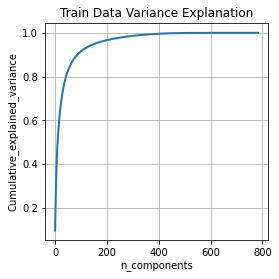

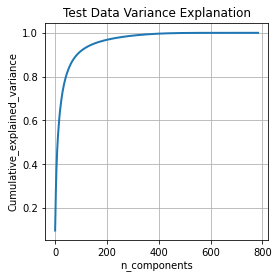

In [189]:
pca = PCA()
X, Y, target_names, featureNames= loadMNIST()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
# Train Data Variance Explanation
plotVarianceData(pca, X_train, "Train Data Variance Explanation",784)

# Test Data Variance Explain
plotVarianceData(pca, X_test, "Test Data Variance Explanation",784)


In [204]:


pca_5 = PCA(n_components=5)
pca_5_train = pca_5.fit_transform(X_train)

pca_5_test = pca_5.transform(X_test)
print(pca_5.explained_variance_ratio_)
print(f"Total variance explained by {pca_5_train.shape[1]} : {np.sum(pca_5.explained_variance_ratio_)}")


[0.09753008 0.07157414 0.06182494 0.0537464  0.04909916]
Total variance explained by 5 : 0.3337747207374538


In [196]:
logisticClassfier = LogisticRegression(penalty='l2', tol =0.0001, C = 1.0,n_jobs=-1)
logisticClassfier.fit(pca_5_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [199]:
print(f"PCA MNIST 5 Features test error : {logisticClassfier.score(pca_5_test, y_test)}")

PCA MNIST 5 Features test error : 0.6742857142857143


In [200]:
print(f"PCA MNIST 5 Features train error : {logisticClassfier.score(pca_5_train, y_train)}")

PCA MNIST 5 Features train error : 0.6742222222222222


In [203]:
# 20 Features PCA

X, Y, target_names, featureNames= loadMNIST()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
pca_20 = PCA(n_components=20)
pca_20_train = pca_20.fit_transform(X_train)

pca_20_test = pca_20.transform(X_test)
print(pca_20.explained_variance_ratio_)
print(f"Total variance explained by {pca_20_train.shape[1]} : {np.sum(pca_20.explained_variance_ratio_)}")


[0.09753008 0.07157414 0.06182494 0.0537464  0.04909916 0.04322221
 0.0328599  0.02891087 0.02761696 0.02331415 0.02111057 0.02031232
 0.01714598 0.0169448  0.01578612 0.01482445 0.01315401 0.01269892
 0.01180974 0.01152589]
Total variance explained by 20 : 0.6450116134473609


In [205]:
logisticClassfier = LogisticRegression(penalty='l2', tol =0.0001, C = 1.0,n_jobs=-1)
logisticClassfier.fit(pca_20_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [206]:
print(f"PCA MNIST 20 Features test error : {logisticClassfier.score(pca_20_test, y_test)}")

PCA MNIST 20 Features test error : 0.8748917748917749


In [207]:
print(f"PCA MNIST 20 Features train error : {logisticClassfier.score(pca_20_train, y_train)}")

PCA MNIST 20 Features train error : 0.8760767590618337


# Spam Data With PCA

In [208]:
data, labels = loadSpamData('spambase.data')
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size = 0.3, random_state = 41)

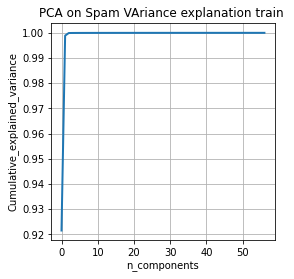

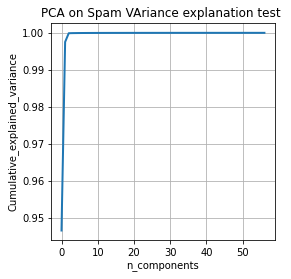

In [209]:
pca = PCA()
plotVarianceData(pca, X_train, "PCA on Spam VAriance explanation train ",X_train.shape[1])
plotVarianceData(pca, X_test, "PCA on Spam VAriance explanation test ",X_test.shape[1])

In [210]:
data, labels = loadSpamData('spambase.data')
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size = 0.3, random_state = 41)
spamfeatureNames  = getFeatureNames()
spamClassfier = LogisticRegression(penalty='l2', tol =0.0001, C = 1.0,n_jobs=-1)
spamClassfier.fit(X_train, Y_train)
# train error
print(f"train error with All {X_train.shape[1]} features : {spamClassfier.score(X_train, Y_train)}")
# test error
print(f"test error  {X_train.shape[1]} features : {spamClassfier.score(X_test, Y_test)}")

train error with All 57 features : 0.9161490683229814
test error  57 features : 0.939174511223751


## Let's apply PCA with top 2,5,20,25 features and compare the result

In [231]:
data, labels = loadSpamData('spambase.data')
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size = 0.3, random_state = 41)

pca_spam_2 = PCA()
pca_spam_2.n_components  = 2
pca_spam_2_train = pca_spam_2.fit_transform(X_train)
pca_spam_2_test = pca_spam_2.transform(X_test)
print(f"Total variance explained on spam data by {pca_spam_2_train.shape[1]} features : {np.sum(pca_spam_2.explained_variance_ratio_)}")



Total variance explained on spam data by 2 features : 0.9988944509097482


In [216]:
#Spam classfier on transformed features
spamClassfierPCA = LogisticRegression(penalty='l2', tol =0.0001, C = 1.0,n_jobs=-1)
spamClassfierPCA.fit(pca_spam_5_train, Y_train)
# train error
print(f"train error with  {pca_spam_5_train.shape[1]} features : {spamClassfierPCA.score(pca_spam_5_train, Y_train)}")
# test error
print(f"test error  {pca_spam_5_test.shape[1]} features : {spamClassfierPCA.score(pca_spam_5_test, Y_test)}")

train error with  2 features : 0.7260869565217392
test error  2 features : 0.7342505430847213


In [229]:
#PCA with 5 features
pca_spam_5 = PCA()
pca_spam_5.n_components  = 5
pca_spam_5_train = pca_spam_5.fit_transform(X_train)
pca_spam_5_test = pca_spam_5.transform(X_test)
print(f"Total variance explained on spam data by {pca_spam_5_train.shape[1]} features : {np.sum(pca_spam_5.explained_variance_ratio_)}")



Total variance explained on spam data by 5 features : 0.9999578493850083


In [230]:
#Spam classfier on transformed features with 5 top features
spamClassfierPCA = LogisticRegression(penalty='l2', tol =0.0001, C = 1.0,n_jobs=-1)
spamClassfierPCA.fit(pca_spam_5_train, Y_train)
# train error
print(f"train error with  {pca_spam_5_train.shape[1]} features : {spamClassfierPCA.score(pca_spam_5_train, Y_train)}")
# test error
print(f"test error  {pca_spam_5_test.shape[1]} features : {spamClassfierPCA.score(pca_spam_5_test, Y_test)}")

train error with  5 features : 0.7888198757763976
test error  5 features : 0.8023171614771905


In [227]:
#  pca with 25 features
pca_spam_25 = PCA()
pca_spam_25.n_components  = 25
pca_spam_25_train = pca_spam_25.fit_transform(X_train)
pca_spam_25_test = pca_spam_25.transform(X_test)
print(f"Total variance explained on spam data by {pca_spam_25_train.shape[1]} features : {np.sum(pca_spam_25.explained_variance_ratio_)}")



Total variance explained on spam data by 25 features : 0.999993499206648


In [228]:
#Spam classfier on transformed features with PCA with 25 feature
spamClassfierPCA = LogisticRegression(penalty='l2', tol =0.0001, C = 1.0,n_jobs=-1)
spamClassfierPCA.fit(pca_spam_25_train, Y_train)
# train error
print(f"train error with  {pca_spam_25_train.shape[1]} features : {spamClassfierPCA.score(pca_spam_25_train, Y_train)}")
# test error
print(f"test error  {pca_spam_25_test.shape[1]} features : {spamClassfierPCA.score(pca_spam_25_test, Y_test)}")

train error with  25 features : 0.8934782608695652
test error  25 features : 0.9181752353367125
